## Image Classification using Gradient Boosting and Convolutional Neural Net

## Gradient Boosting

### What is Gradient Boosting?

Gradient boosting is an ensemble learning technique that combines multiple weak learners (typically decision trees) to create a strong learner.
It's primarily used for tabular data and structured datasets.
Feature engineering is required to extract relevant features from images and convert them into tabular data for use with gradient boosting algorithms.
While gradient boosting can be effective for structured data with feature engineering, it's not a common choice for image classification tasks.

Gradient boosting is similar to a pendulum analogy. Imagine a pendulum where the equilibrium position represents the true value we want to predict. Initially, the pendulum's bob is randomly placed,  which represents the initial prediction. The algorithm starts swinging the pendulum and measures the difference between the bob's position at zero velocity (swinging end points) and the equilibrium, which indicates the error.

The goal is to minimize this error by adding weak learners to the ensemble, similar to how the pendulum swings. Each weak learner captures a specific aspect of the relationship between the input features and the target variable, gradually improving the prediction. The algorithm focuses on reducing the errors made by the previous ensemble, just as the bob's zero velocity position gets closer to the equilibrium with each swing due to gravity.

By iterating and adding more weak learners, the pendulum swings back and forth, slowly converging towards the equilibrium. Similarly, gradient boosting improves its predictions, minimizing the error as it approaches the true value. This iterative process allows the algorithm to approximate the underlying relationship between the input features and the target variable, leading to more accurate predictions.

In summary, gradient boosting, like a pendulum, iteratively adjusts its predictions by adding weak learners that correct the errors made by the previous ensemble. This iterative correction enables the algorithm to approximate the true value and establish the relationship between the input and output variables.

![title](Pendulum.jpg)

### Image Classification using Gradient Boosting

In this notebook, we will utilize Gradient Boosting for image classification. 
Our objective is to create an image classifier using Gradient Boosting to identify unique handwritten Chinese numbers.</p>
For this, we will be using the "Chinese MNIST" dataset which can be found in kaggle.</p>
Link to dataset: https://www.kaggle.com/datasets/gpreda/chinese-mnist

**Dataset Description (quoted from Gabriel Preda)**</p>
One hundred Chinese nationals took part in data collection. Each participant wrote with a standard black ink pen all 15 numbers in a table with 15 designated regions drawn on a white A4 paper. This process was repeated 10 times with each participant. Each sheet was scanned at the resolution of 300x300 pixels.
It resulted a dataset of 15000 images, each representing one character from a set of 15 characters (grouped in samples, grouped in suites, with 10 samples/volunteer and 100 volunteers).

---

In [1]:
import os
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# defining a function to retrieve a list of image file paths
def get_image_paths(folder_path):
    image_extensions = [".jpg", ".jpeg", ".png"]
    image_paths = []
    for filename in os.listdir(folder_path):
        if any(ext in filename.lower() for ext in image_extensions):
            image_paths.append(os.path.join(folder_path, filename))
    return sorted(image_paths)

In [2]:
data_folder = "data" # folder where the images reside

data_folder_path = os.path.join(os.getcwd(), data_folder)
image_paths = get_image_paths(data_folder_path)

In [3]:
# preview list of image file paths
image_paths[:10]

['C:\\Users\\mdrai\\Desktop\\File Folder\\Data Science\\Projects\\Chinese MNIST\\data\\input_100_10_1.jpg',
 'C:\\Users\\mdrai\\Desktop\\File Folder\\Data Science\\Projects\\Chinese MNIST\\data\\input_100_10_10.jpg',
 'C:\\Users\\mdrai\\Desktop\\File Folder\\Data Science\\Projects\\Chinese MNIST\\data\\input_100_10_11.jpg',
 'C:\\Users\\mdrai\\Desktop\\File Folder\\Data Science\\Projects\\Chinese MNIST\\data\\input_100_10_12.jpg',
 'C:\\Users\\mdrai\\Desktop\\File Folder\\Data Science\\Projects\\Chinese MNIST\\data\\input_100_10_13.jpg',
 'C:\\Users\\mdrai\\Desktop\\File Folder\\Data Science\\Projects\\Chinese MNIST\\data\\input_100_10_14.jpg',
 'C:\\Users\\mdrai\\Desktop\\File Folder\\Data Science\\Projects\\Chinese MNIST\\data\\input_100_10_15.jpg',
 'C:\\Users\\mdrai\\Desktop\\File Folder\\Data Science\\Projects\\Chinese MNIST\\data\\input_100_10_2.jpg',
 'C:\\Users\\mdrai\\Desktop\\File Folder\\Data Science\\Projects\\Chinese MNIST\\data\\input_100_10_3.jpg',
 'C:\\Users\\mdrai\\De

The image file paths are not sorted. Hence, let us sort the list based according to their file names in ascending order.</p>
Why do we do this? So that the file path names tally with the rows of the Chinese MNIST CSV file.
We will read the csv in the cells below.

In [4]:
# sort the list of image paths according to their names
image_paths_sorted = sorted(image_paths, key=lambda x: (int(x.split('_')[1]), int(x.split('_')[2]), int(x.split('_')[3].split('.')[0])))

In [5]:
image_rgb = [] # rgb image list to preview the handwritten chinese letters
x_image_data = [] # initialize a list of image data

for image_path in image_paths_sorted:
    image = Image.open(image_path).convert("P")
    image_rgb.append(image.convert("RGB"))

    image_array = np.array(image) # convert the image in P mode to numpy array

    x_image_data.append(image_array)

In [6]:
df = pd.read_csv("chinese_mnist.csv")

In [7]:
df.sort_values(["suite_id", "sample_id", "code"], inplace = True)

In [8]:
df.head(30)

,suite_id,sample_id,code,value,character
6000,1,1,1,0,零
7000,1,1,2,1,一
8000,1,1,3,2,二
9000,1,1,4,3,三
10000,1,1,5,4,四
11000,1,1,6,5,五
12000,1,1,7,6,六
13000,1,1,8,7,七
14000,1,1,9,8,八
0,1,1,10,9,九


In [9]:
y = df['value'].tolist()

In [10]:
# Convert image data and output value lists to numpy arrays
x_np = np.array(x_image_data)
y_np = np.array(y)

In [11]:
print("x_np shape:", x_np.shape)
print("y_np shape:", y_np.shape)

x_np shape: (15000, 64, 64)
y_np shape: (15000,)


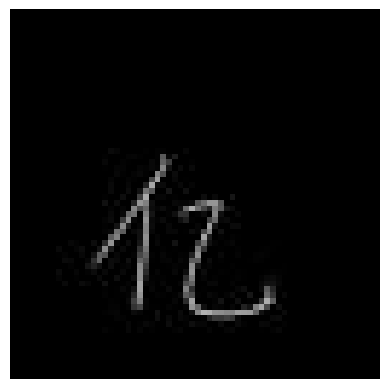

In [12]:
# preview of the handwritten images
plt.imshow(image_rgb[14])
plt.axis('off')
plt.show()

In [13]:
# Reshape X_train to have 2D arrays
x_np_reshaped = x_np.reshape(x_np.shape[0], -1)
x_train,x_test,y_train,y_test = train_test_split(x_np_reshaped, y_np, test_size=0.2, random_state=3)

# Building the model
gbc = GradientBoostingClassifier(n_estimators=10, 
                                 criterion="squared_error", 
                                 learning_rate=0.1, 
                                 max_depth=3)

gbc.fit(x_train, y_train)

GradientBoostingClassifier(criterion='squared_error', n_estimators=10)

In [14]:
# Make predictions on the training set
y_train_pred = gbc.predict(x_train)
y_train_pred

array([10,  2,  2, ...,  8,  8,  9])

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

accuracy = accuracy_score(y_train, y_train_pred)
print("Training accuracy:", accuracy)

Training accuracy: 0.4950833333333333


Gradient Boosting Tree:


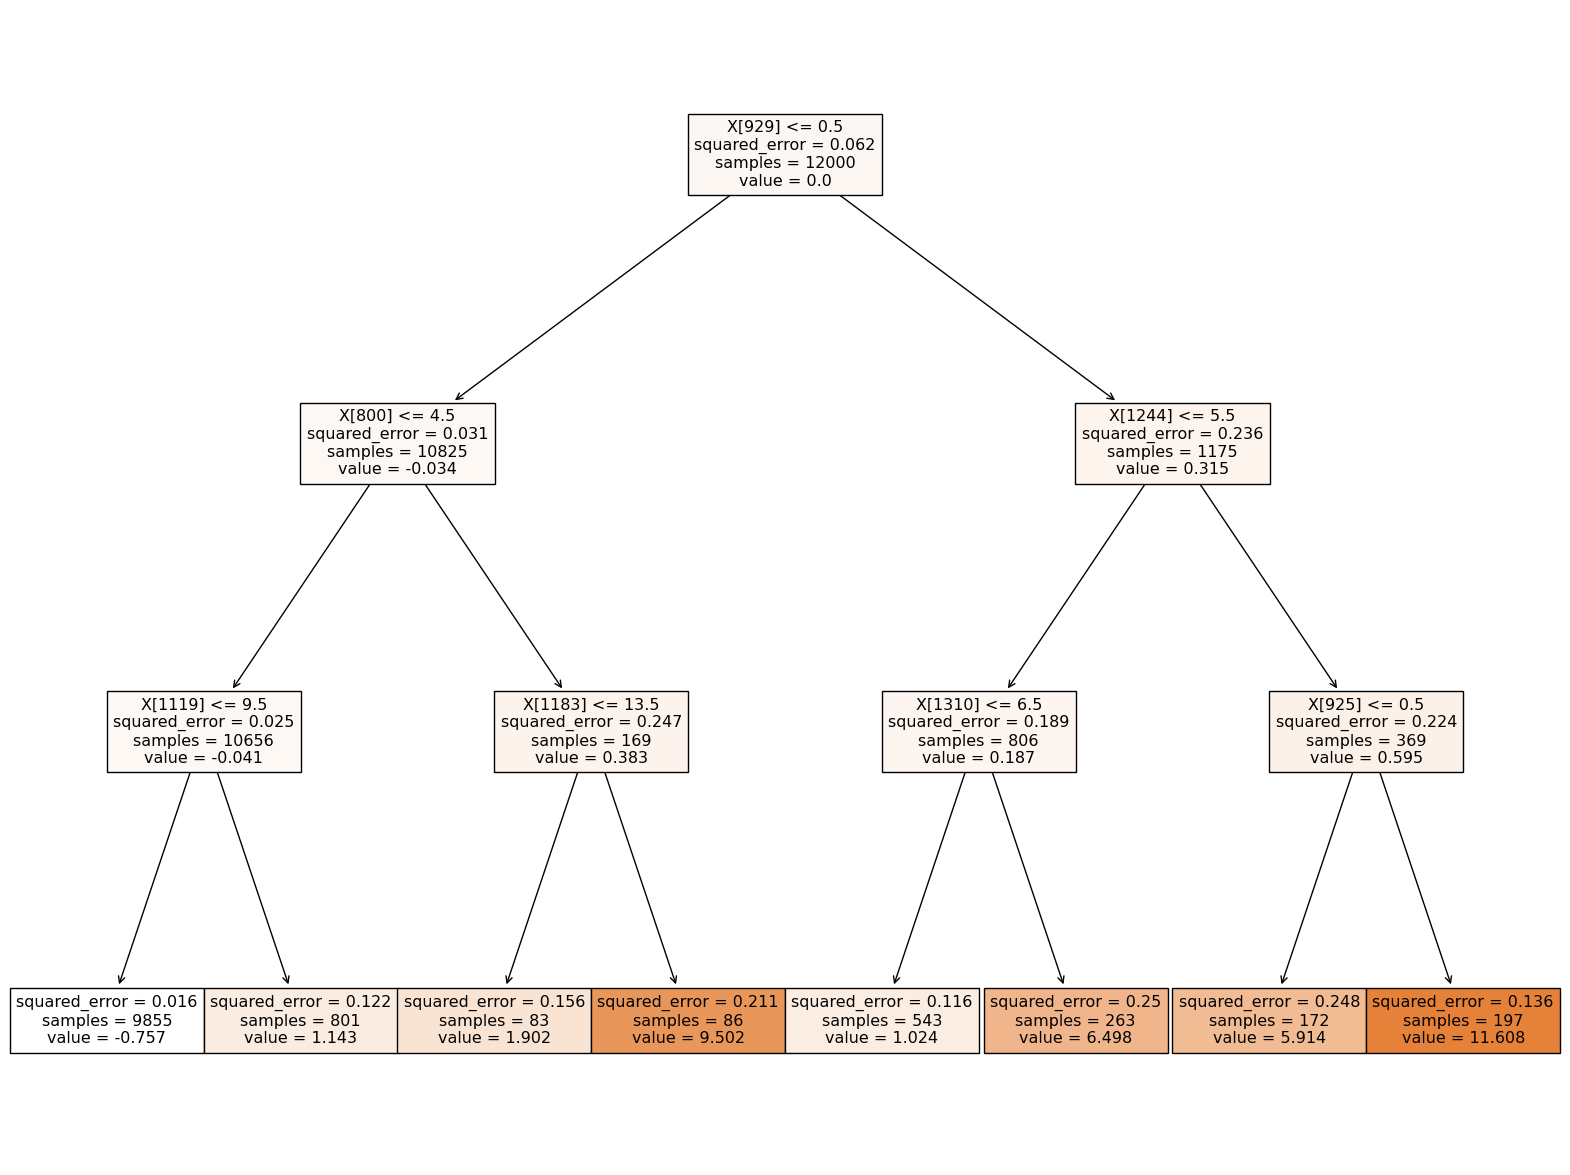

In [16]:
# Gradient Boosting Tree Plots
plt.figure(figsize= (20,15))
_ = tree.plot_tree(gbc[0][0], 
                   filled=True)
print("Gradient Boosting Tree:")

In [17]:
accuracy_score(y_test, gbc.predict(x_test))

0.395

### Using GridSearchCV to find the best parameters

To save time and computational cost, we will shrink the dataset before performing GridSearchCV

In [18]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (12000, 4096)
y_train shape: (12000,)


In [19]:
# reducing dataset size to reduce computation time for GridSearchCV. Feel free to keep the original size
x_np_reshaped_resized = x_np[:150].reshape(x_np[:150].shape[0], -1)
x_train,x_test,y_train,y_test = train_test_split(x_np_reshaped_resized, y_np[:150], test_size=0.2, random_state=3, shuffle=False)

In [20]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (120, 4096)
y_train shape: (120,)


In [21]:
from sklearn.model_selection import GridSearchCV

# List Hyperparameters that we want to tune. You can include more parameters to find the best one and improve accuracy.
n_estimators = [2,10]
criterion = ['squared_error']
learning_rate = [0.01, 1]
max_depth = [1, 3]

# Convert to dictionary
hyperparameters = dict(n_estimators=n_estimators,
                       criterion=criterion,
                       learning_rate=learning_rate,
                       max_depth=max_depth)

# Create new lgr_2 object
gbc_cv = GradientBoostingClassifier()

# Use GridSearch
grid_search = GridSearchCV(estimator=gbc_cv, param_grid=hyperparameters, verbose=1)

# Fit the model
grid_search.fit(x_train, y_train)

# print the best hyperparameter values found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)


best_gbc = grid_search.best_estimator_

print("accuracy_score", accuracy_score(y_test, best_gbc.predict(x_test)))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters: {'criterion': 'squared_error', 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 10}
accuracy_score 0.3


In [22]:
print("accuracy_score", accuracy_score(y_test, best_gbc.predict(x_test)))

accuracy_score 0.3


## Convolutional Neural Net (CNN)

### What is Convolutional Neural Net?

CNNs are a specialized type of deep learning neural network that are designed to process and classify images directly, without the need for explicit feature engineering.</p>
CNNs can automatically learn hierarchical patterns and features from raw image data, making them highly effective for image classification tasks. They use convolutional layers to extract relevant features from the input images and then pass those features through fully connected layers for classification. It has achieved state-of-the-art performance on various image classification benchmarks and are widely used in computer vision tasks.

### Image Classification with Convolutional Neural Net

In [23]:
#import deep learning tools 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow
import warnings

In [24]:
# Set the seed value for experiment reproducibility.
seed = 1842
tensorflow.random.set_seed(seed)
np.random.seed(seed)
# Turn off warnings for cleaner looking notebook
warnings.simplefilter('ignore')

In [25]:
# get_dummines to convert y_np into One hot encoded matrix. This is to represent the integer values into integer categories
y_labels = pd.get_dummies(y_np).values

In [26]:
y_labels.shape

(15000, 15)

In [27]:
# we are taking a fraction of the original dataset only to reduce computation time of the model
x_train,x_test,y_train,y_test = train_test_split(x_np[:4500], y_labels[:4500], test_size=0.2, random_state=3, shuffle=False)

In [28]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (3600, 64, 64)
y_train shape: (3600, 15)


In [29]:
# Layers of the Convolutional Neural Net
model= keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu', input_shape=(64,64,1,)))
model.add(keras.layers.Conv2D(filters=32,kernel_size = 3,activation='tanh'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(filters=32,kernel_size = 2,activation='tanh'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(filters=32,kernel_size = 2,activation='tanh'))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(20,activation='relu'))
model.add(keras.layers.Dense(15,activation='relu'))
model.add(keras.layers.Dense(15,activation = 'softmax'))

In [30]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics = ['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        4

In [32]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test,y_test))

Epoch 1/20
113/113 [==============================] - 8s 66ms/step - loss: 2.1322 - accuracy: 0.3097 - val_loss: 1.2863 - val_accuracy: 0.5856
Epoch 2/20
113/113 [==============================] - 7s 66ms/step - loss: 0.8530 - accuracy: 0.7250 - val_loss: 0.6115 - val_accuracy: 0.8056
Epoch 3/20
113/113 [==============================] - 7s 64ms/step - loss: 0.4464 - accuracy: 0.8617 - val_loss: 0.5170 - val_accuracy: 0.8033
Epoch 4/20
113/113 [==============================] - 7s 63ms/step - loss: 0.2933 - accuracy: 0.9072 - val_loss: 0.6974 - val_accuracy: 0.7767
Epoch 5/20
113/113 [==============================] - 7s 62ms/step - loss: 0.2244 - accuracy: 0.9236 - val_loss: 0.3956 - val_accuracy: 0.8567
Epoch 6/20
113/113 [==============================] - 7s 64ms/step - loss: 0.1369 - accuracy: 0.9611 - val_loss: 0.3674 - val_accuracy: 0.8833
Epoch 7/20
113/113 [==============================] - 7s 63ms/step - loss: 0.1032 - accuracy: 0.9711 - val_loss: 0.4558 - val_accuracy: 0.8489

In [33]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

29/29 [==============================] - 0s 13ms/step - loss: 0.3657 - accuracy: 0.9056
Loss: 0.3656560480594635
Accuracy: 0.9055555462837219


In [34]:
# Function to plot accuracy and loss curves
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    #plot loss
    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot accuracy
    plt.figure() 
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

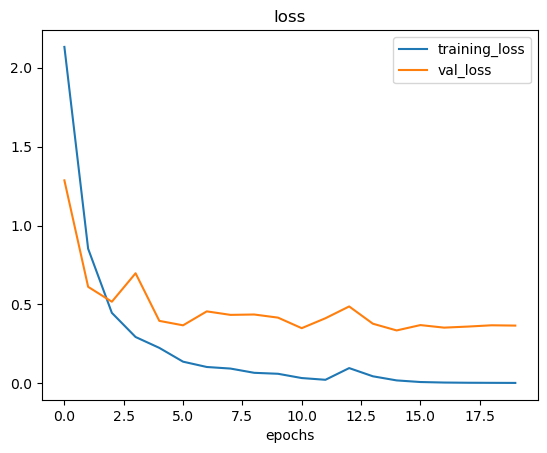

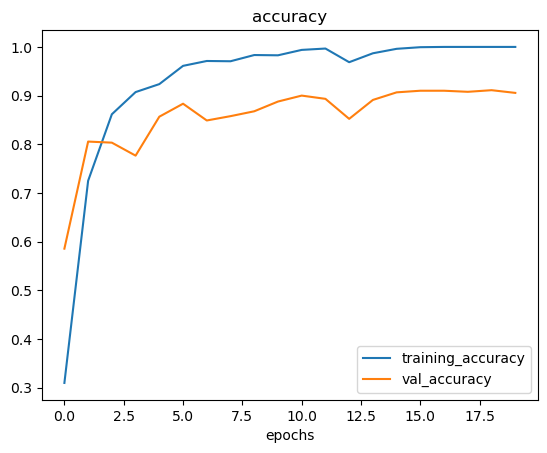

In [35]:
plot_loss_curves(history)

## Parameter Tuning to find the best parameters

In [36]:
pip install -U keras-tuner

In [37]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu', input_shape=(64,64,1,)))
    model.add(keras.layers.Conv2D(filters=32,kernel_size = 3,activation='tanh'))
    model.add(keras.layers.MaxPooling2D())
    model.add(keras.layers.Conv2D(filters=32,kernel_size = 2,activation='tanh'))
    model.add(keras.layers.MaxPooling2D())
    
    for i in range(hp.Int("Conv Layers", min_value=0, max_value=1)):
        model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16,32, 64]), 2, activation='tanh'))

    model.add(keras.layers.Flatten())
    
    model.add(keras.layers.Dense(20,activation='relu'))
    model.add(keras.layers.Dense(hp.Choice("Dense layer", [15, 16, 32]), activation='relu'))
    model.add(keras.layers.Dense(15, activation='softmax'))

    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=24,
)

tuner.search(x_train, y_train, validation_data=(x_test,y_test), epochs=20)

Trial 17 Complete [00h 02m 14s]
val_accuracy: 0.9044444561004639

Best val_accuracy So Far: 0.9388889074325562
Total elapsed time: 00h 40m 04s
INFO:tensorflow:Oracle triggered exit


In [38]:
best_model = tuner.get_best_models()[0]

In [39]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 16)        2

In [40]:
loss, accuracy = best_model.evaluate(x_test, y_test)

print("LOSS", loss)
print("ACCURACY", accuracy)

29/29 [==============================] - 1s 15ms/step - loss: 0.2491 - accuracy: 0.9389
LOSS 0.24907872080802917
ACCURACY 0.9388889074325562


## Summary

In summary, while gradient boosting is a powerful technique for structured data and tabular datasets, it is not the ideal choice for image classification tasks. CNNs, on the other hand, are specifically designed for image classification and excel at automatically learning and extracting features from raw image data, making them the standard choice for most image classification problems. If you are working with image data, CNNs are likely the better option for achieving high accuracy and performance.